In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data collection and Analysis

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isna().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data Analysis

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

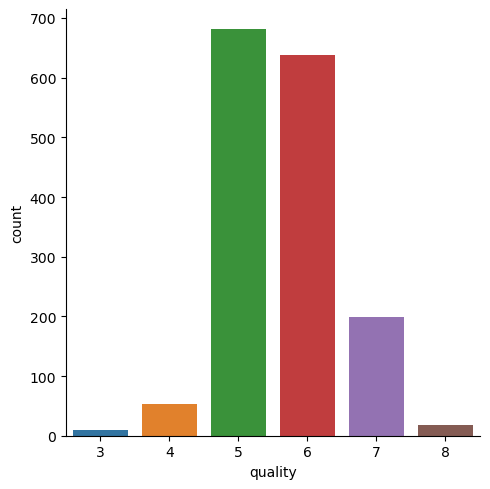

In [10]:
sns.catplot(x='quality',data=df, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

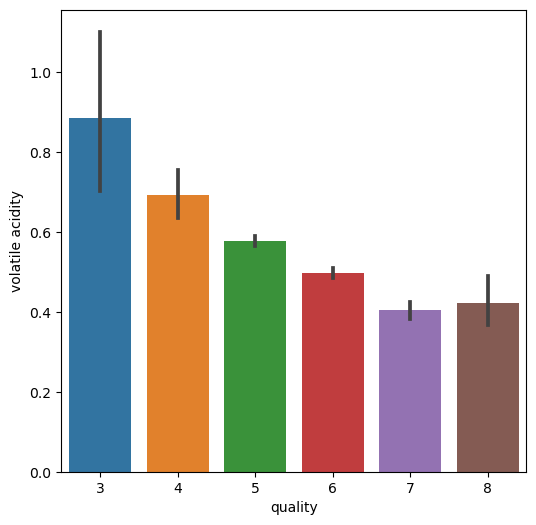

In [11]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

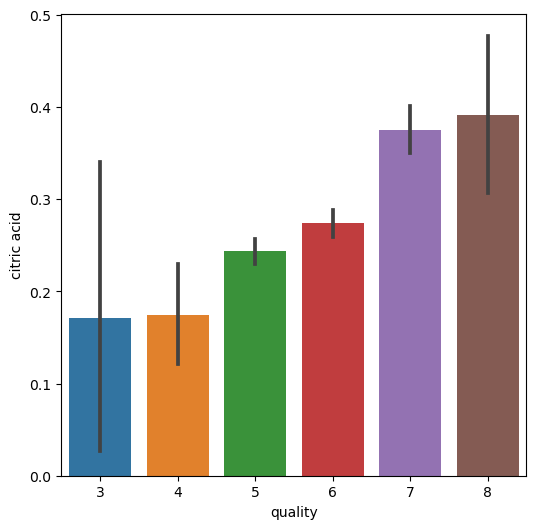

In [12]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='citric acid', data = df)

<Axes: xlabel='quality', ylabel='residual sugar'>

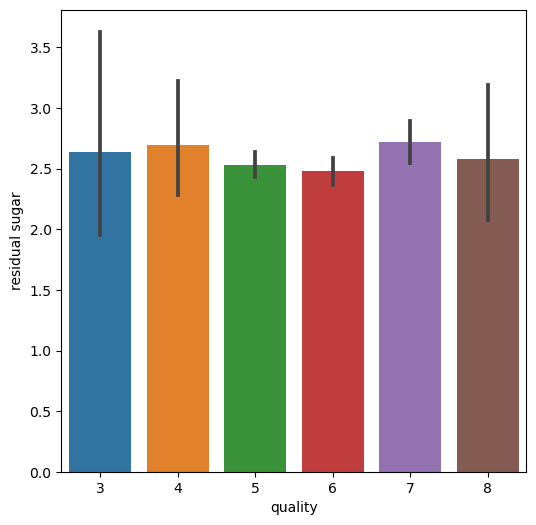

In [13]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

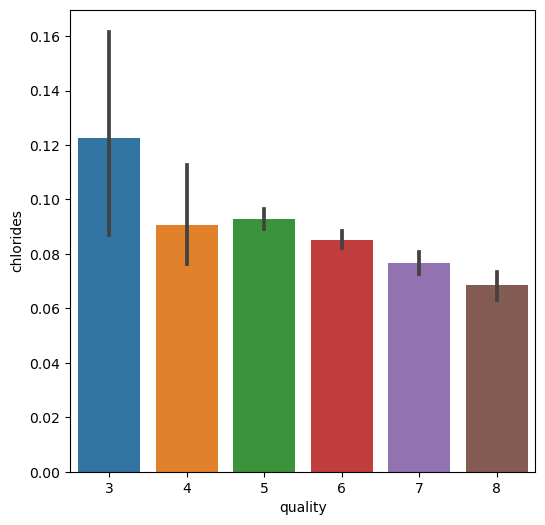

In [14]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

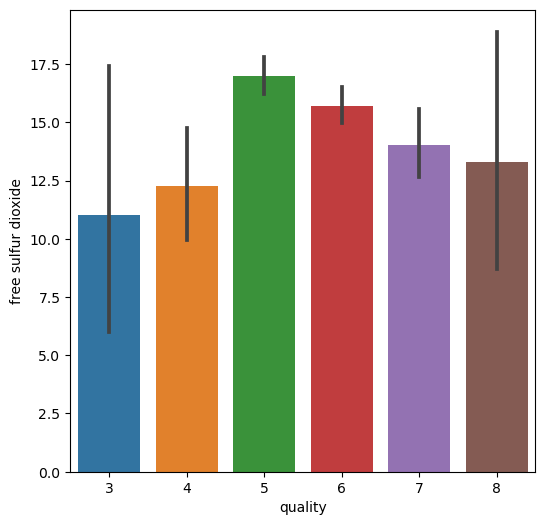

In [15]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

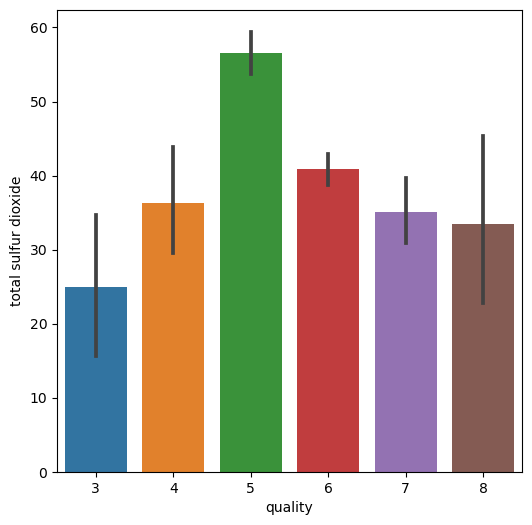

In [16]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='total sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='density'>

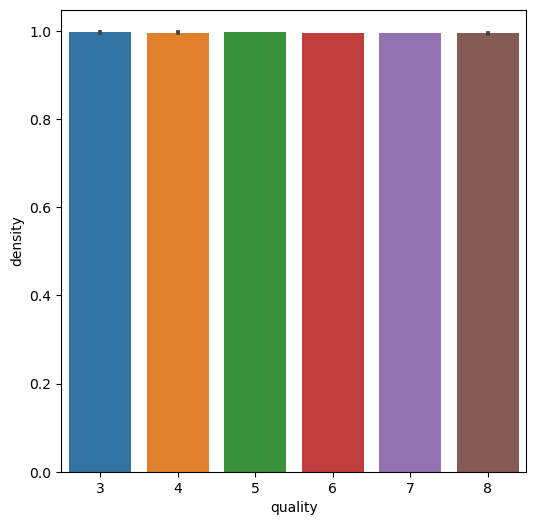

In [17]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='density', data = df)

<Axes: xlabel='quality', ylabel='pH'>

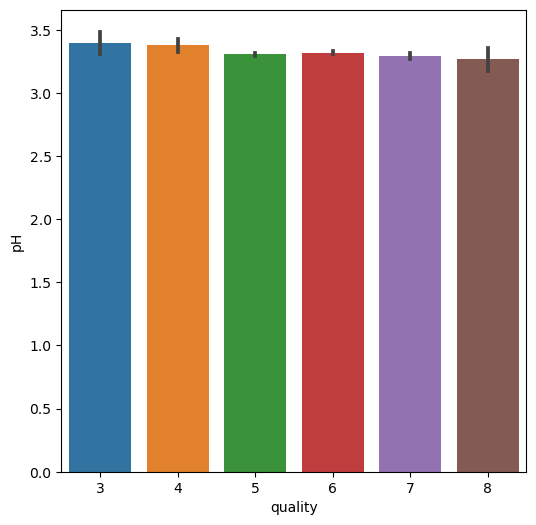

In [18]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='pH', data = df)

<Axes: xlabel='quality', ylabel='sulphates'>

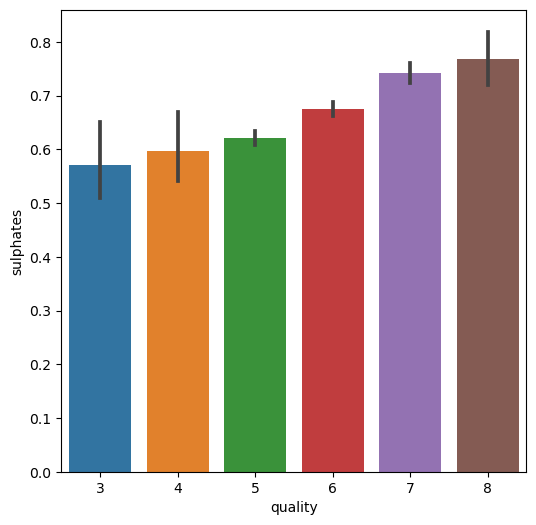

In [19]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='sulphates', data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

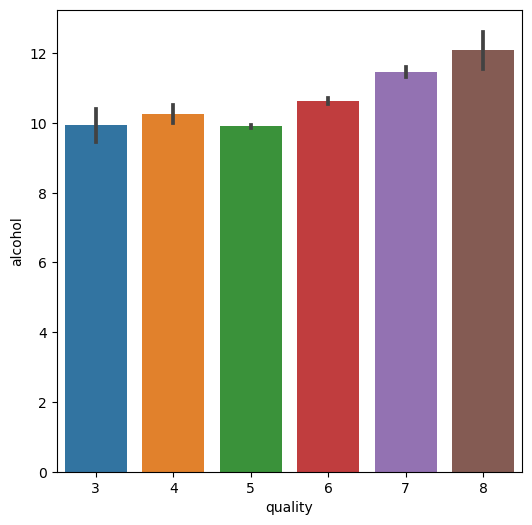

In [20]:
plot = plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='alcohol', data = df)

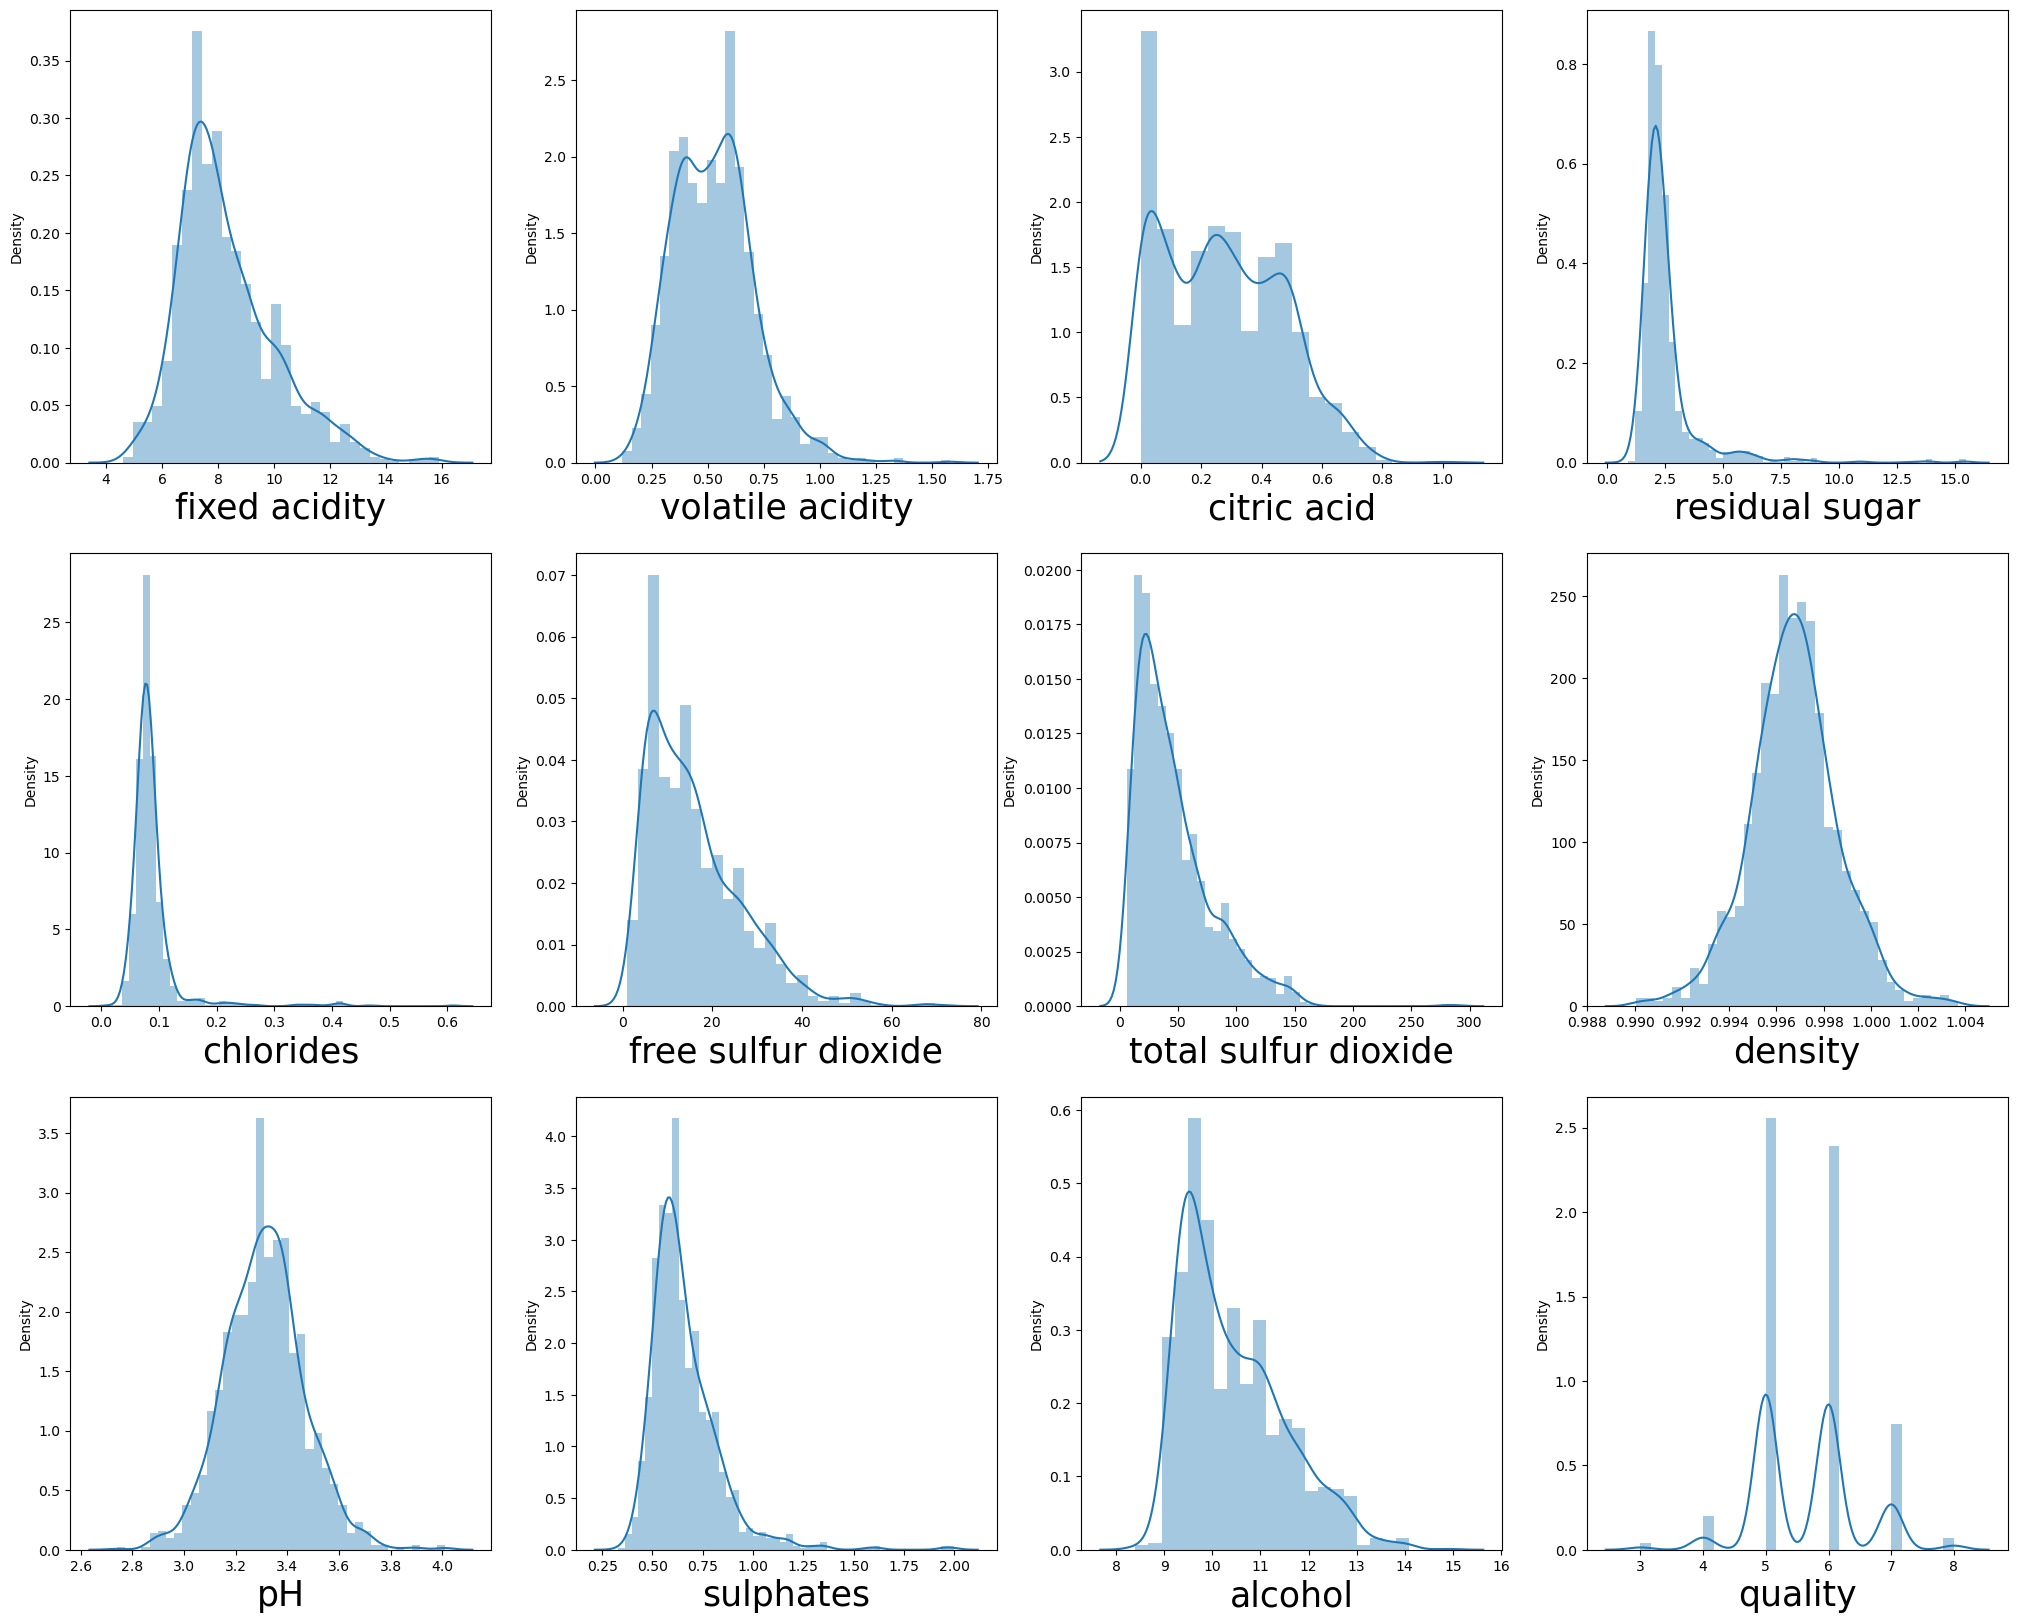

In [21]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

# check the skewess

In [22]:
df_features = df.drop('quality',axis=1)

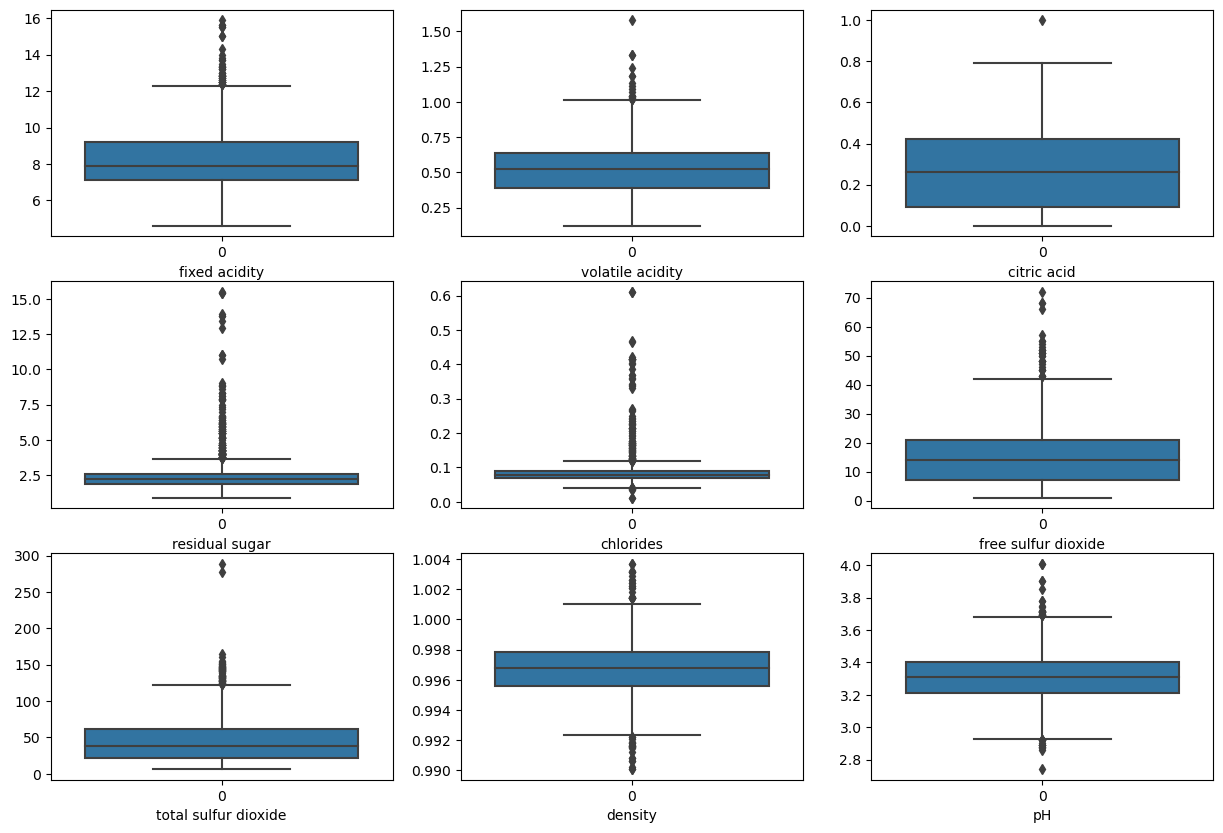

In [23]:
plt.figure(figsize=(15,10))
graph = 1

for column in df_features:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [24]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Remove the skewness

In [25]:
df['fixed acidity'] = np.cbrt(df['fixed acidity'])
df['volatile acidity'] = np.cbrt(df['volatile acidity'])
df['citric acid'] = np.cbrt(df['citric acid'])
df['residual sugar'] = np.cbrt(df['residual sugar'])
df['chlorides'] = np.cbrt(df['chlorides'])
df['free sulfur dioxide'] = np.cbrt(df['free sulfur dioxide'])
df['total sulfur dioxide'] = np.cbrt(df['total sulfur dioxide'])
df['density'] = np.cbrt(df['density'])
df['pH'] = np.cbrt(df['pH'])

In [26]:
df.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid            -1.078368
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.065752
pH                      0.067446
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

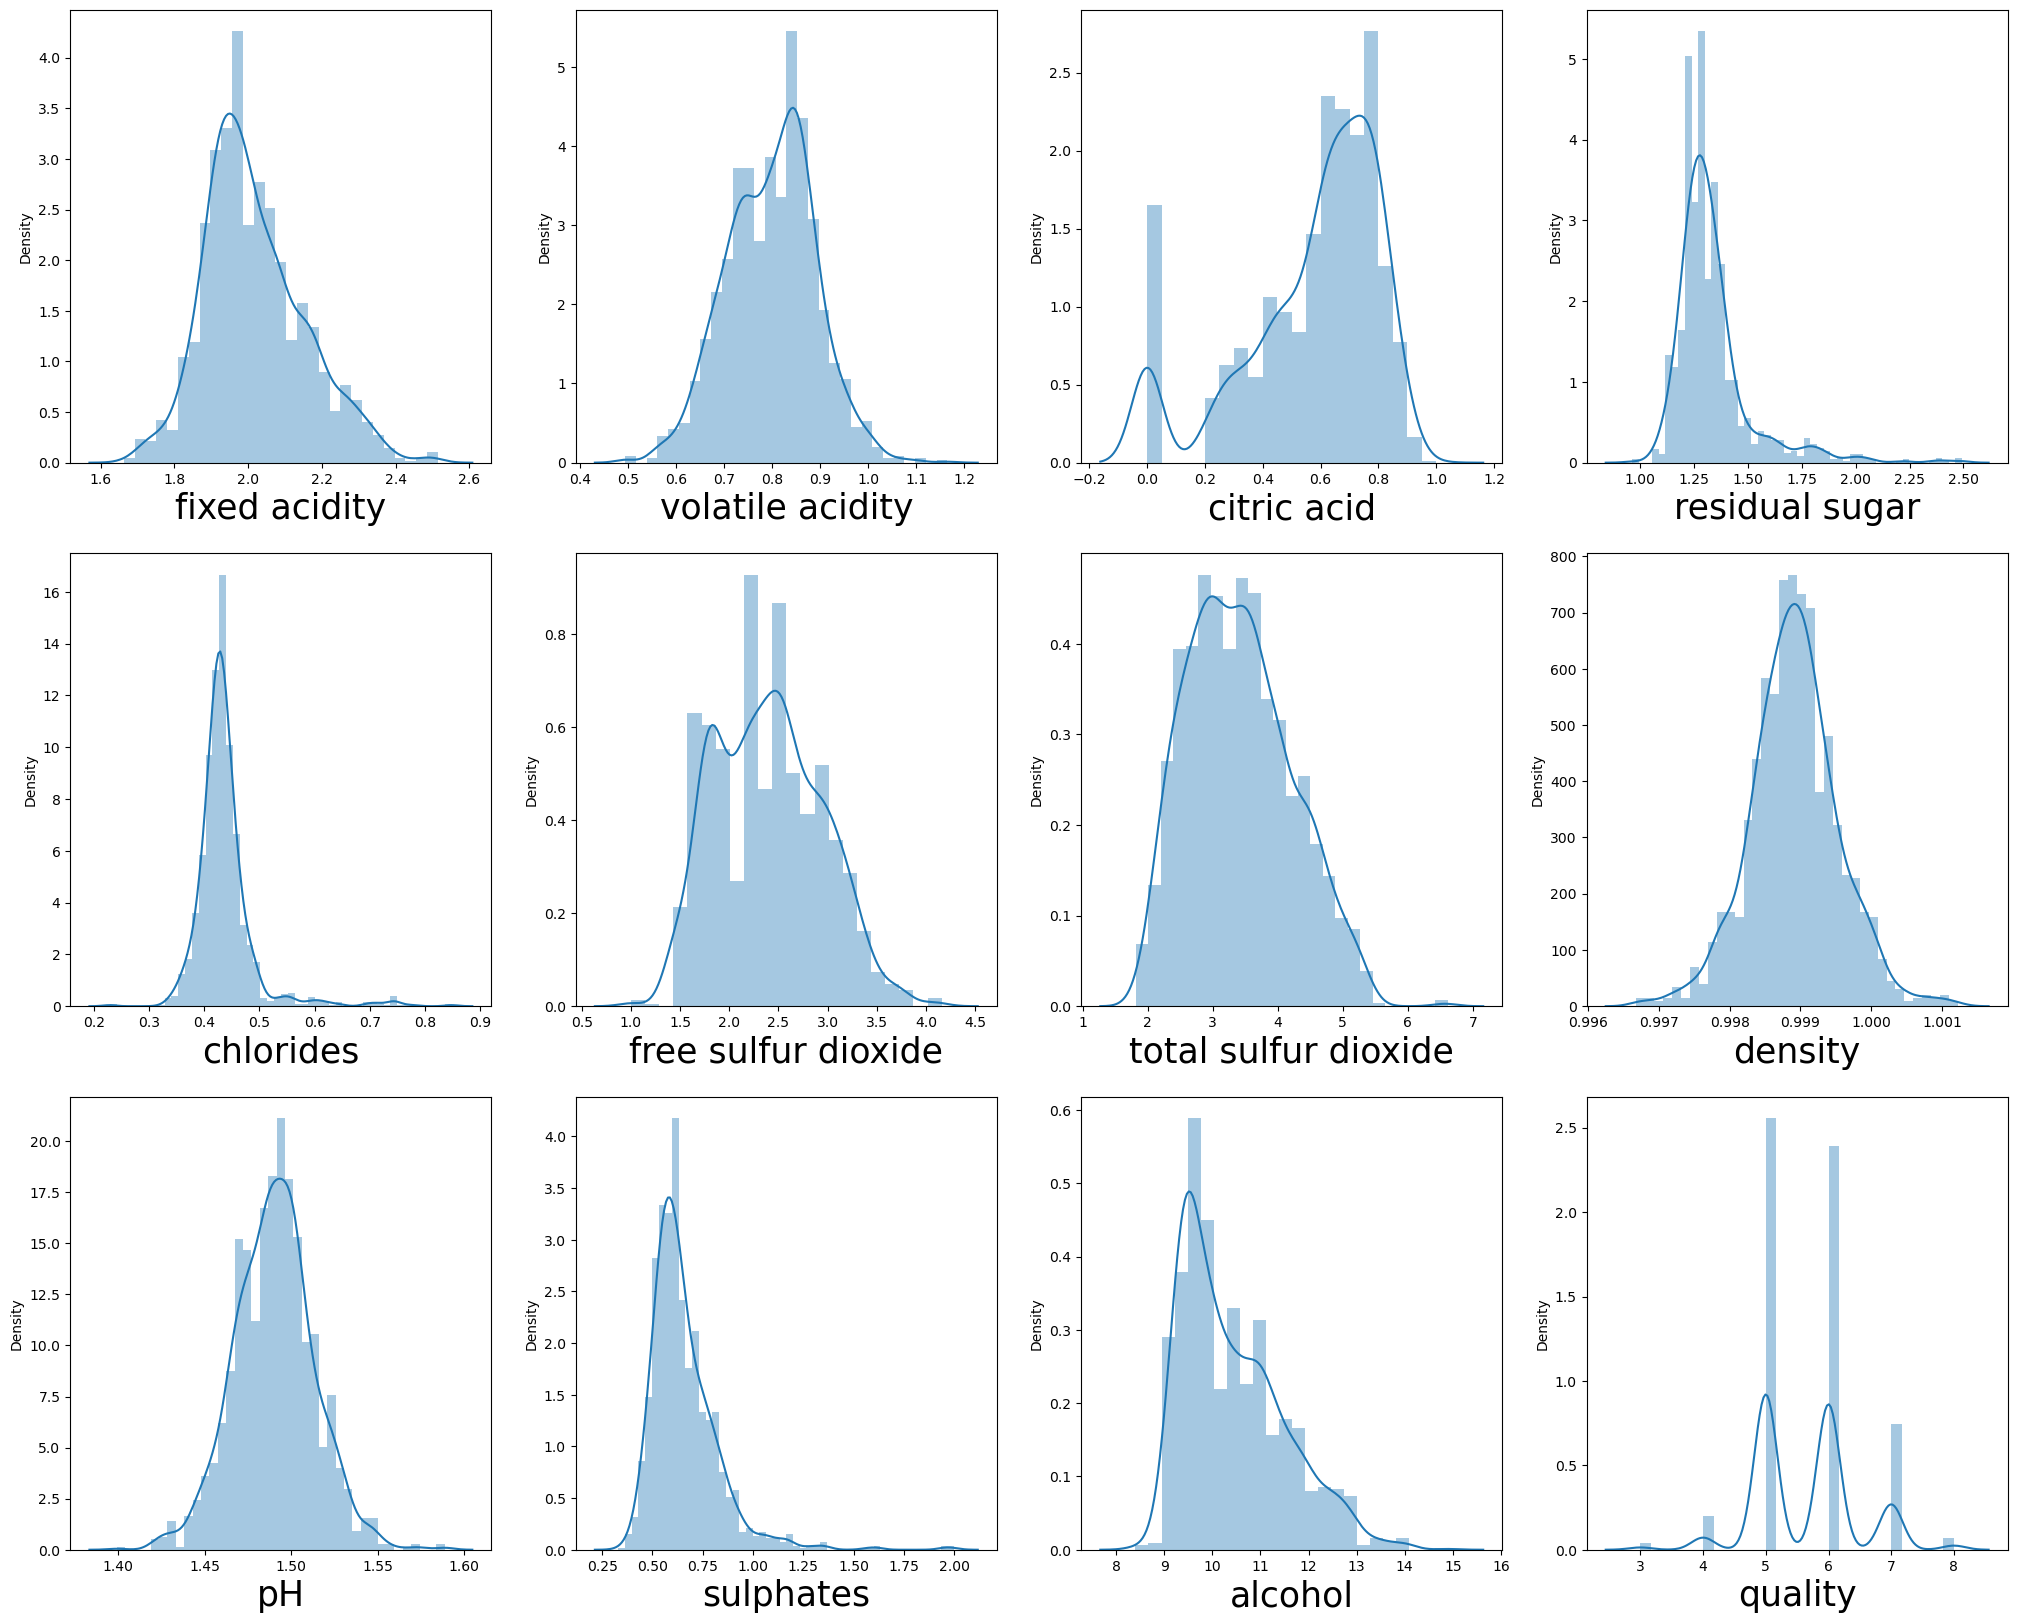

In [27]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

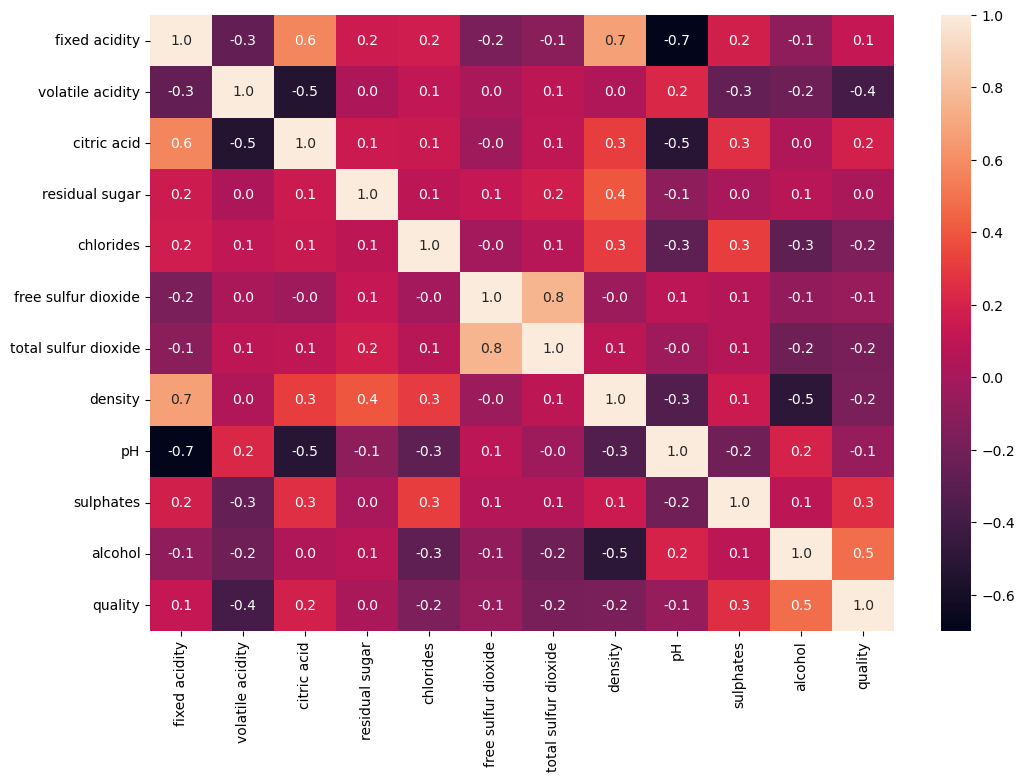

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, fmt='0.1f')
plt.show()

# Replace contious value to categorical value

In [29]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [30]:
df['quality']=[1 if x>=7 else 0 for x in df['quality']]

In [31]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# split the data features and target value

In [32]:
X = df.drop('quality',axis=1)
Y = df['quality']

In [33]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.948695,0.887904,0.000000,1.238562,0.423582,2.223980,3.239612,0.999266,1.519739,0.56,9.4
1,1.983192,0.958284,0.000000,1.375069,0.461044,2.924018,4.061548,0.998932,1.473613,0.68,9.8
2,1.983192,0.912581,0.341995,1.320006,0.451436,2.466212,3.779763,0.998999,1.482766,0.65,9.8
3,2.237378,0.654213,0.824257,1.238562,0.421716,2.571282,3.914868,0.999333,1.467447,0.58,9.8
4,1.948695,0.887904,0.000000,1.238562,0.423582,2.223980,3.239612,0.999266,1.519739,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.837091,0.843433,0.430887,1.259921,0.448140,3.174802,3.530348,0.998297,1.511030,0.58,10.5
1595,1.806969,0.819321,0.464159,1.300591,0.395789,3.391211,3.708430,0.998371,1.521181,0.76,11.2
1596,1.846915,0.798957,0.506580,1.320006,0.423582,3.072317,3.419952,0.998578,1.506637,0.75,11.0
1597,1.806969,0.864012,0.493242,1.259921,0.421716,3.174802,3.530348,0.998488,1.528350,0.71,10.2


In [34]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

# splitting the training and testing data

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=345)

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train

array([[-1.0330586 , -0.41808074, -0.18246008, ...,  0.07115984,
        -0.22043129, -1.07304588],
       [ 0.53364708,  1.25754559, -0.98515143, ..., -0.1227173 ,
        -0.67769272, -0.69853596],
       [-1.61748699,  2.22323283,  1.25614423, ...,  2.19100584,
        -0.33474665,  0.98675867],
       ...,
       [-0.23918122,  0.32778795,  0.43422766, ..., -0.1227173 ,
        -0.7348504 , -1.07304588],
       [ 0.41976763,  0.45781044,  0.71448709, ..., -0.25262439,
        -0.50621968, -1.07304588],
       [-0.23918122,  0.48337578,  0.27083746, ..., -0.64555224,
        -0.79200808, -0.511281  ]])

In [38]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n=====================Train Result=================")
        
        print(f"acccuracy score :{accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n=====================Test Result==================")
        print(f"accuracy score :{accuracy_score(y_test, pred) * 100:.2f}%")
         
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

# model training

In [39]:
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

# Predict the model

In [40]:
metric_score(log,X_train,X_test,Y_train,Y_test,train=True)
metric_score(log,X_train,X_test,Y_train,Y_test,train=False)


=====================Train Result=================
acccuracy score :88.57%

=====================Test Result==================
accuracy score :87.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       346
           1       0.62      0.24      0.35        54

    accuracy                           0.88       400
   macro avg       0.76      0.61      0.64       400
weighted avg       0.85      0.88      0.85       400



# Hyperparameter tuning

In [41]:
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,15)
}

In [42]:
grid_search = GridSearchCV(estimator=log,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

# Model training

In [43]:
log = DecisionTreeClassifier(criterion = 'entropy', min_samples_split =2,max_depth= 14, min_samples_leaf= 4)

log.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=4)

# Predict the model

In [44]:
metric_score(log,X_train,X_test,Y_train,Y_test,train=True)
metric_score(log,X_train,X_test,Y_train,Y_test,train=False)


=====================Train Result=================
acccuracy score :96.75%

=====================Test Result==================
accuracy score :88.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       346
           1       0.61      0.46      0.53        54

    accuracy                           0.89       400
   macro avg       0.76      0.71      0.73       400
weighted avg       0.88      0.89      0.88       400



# confusion matrix

In [56]:
log_reg = LogisticRegression()

log_reg.fit(X_train,Y_train)

LogisticRegression()

In [58]:
y_pred = log_reg.predict(X_test)

In [59]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
log_reg.predict_proba(X_test)

array([[0.99486971, 0.00513029],
       [0.77948161, 0.22051839],
       [0.86790927, 0.13209073],
       [0.96989802, 0.03010198],
       [0.91092614, 0.08907386],
       [0.96983754, 0.03016246],
       [0.99383765, 0.00616235],
       [0.60290353, 0.39709647],
       [0.95143596, 0.04856404],
       [0.93397718, 0.06602282],
       [0.36891773, 0.63108227],
       [0.99442032, 0.00557968],
       [0.87237523, 0.12762477],
       [0.68412809, 0.31587191],
       [0.93663508, 0.06336492],
       [0.85147729, 0.14852271],
       [0.68645932, 0.31354068],
       [0.99637391, 0.00362609],
       [0.91207301, 0.08792699],
       [0.84008657, 0.15991343],
       [0.70800343, 0.29199657],
       [0.99503254, 0.00496746],
       [0.40385385, 0.59614615],
       [0.93500984, 0.06499016],
       [0.95014478, 0.04985522],
       [0.91923898, 0.08076102],
       [0.97327947, 0.02672053],
       [0.97750791, 0.02249209],
       [0.74991831, 0.25008169],
       [0.56805228, 0.43194772],
       [0.

In [64]:
conf_mat = confusion_matrix(Y_test,y_pred)
conf_mat

array([[338,   8],
       [ 41,  13]], dtype=int64)

In [66]:
accuracy = accuracy_score(Y_test,y_pred)*100
accuracy

87.75

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       346
           1       0.62      0.24      0.35        54

    accuracy                           0.88       400
   macro avg       0.76      0.61      0.64       400
weighted avg       0.85      0.88      0.85       400



In [70]:
from sklearn import metrics

In [71]:
fpr,tpr,thresholds = metrics.roc_curve(Y_test,y_pred)

In [72]:
print('Threshold =',thresholds)
print('True Positive Rate =',tpr)
print('False Positive Rate =',fpr)

Threshold = [inf  1.  0.]
True Positive Rate = [0.         0.24074074 1.        ]
False Positive Rate = [0.         0.02312139 1.        ]


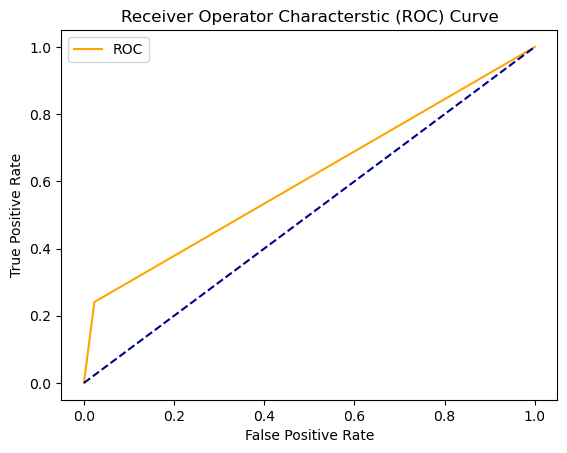

In [73]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characterstic (ROC) Curve')
plt.legend()
plt.show()

In [75]:
auc_score = roc_auc_score(Y_test,y_pred)
print (auc_score)

0.6088096767287519
